<font color="#CA3532"><h1 align="left">Inteligencia Artificial Aplicada a la Bolsa (MIAX-13)</h1></font>
<font color="#5b5a59"><h2 align="left">Extensión del modelo de regresión lineal a una dimensión arbitraria</h2></font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Datos sintéticos

Generación de los datos del problema:

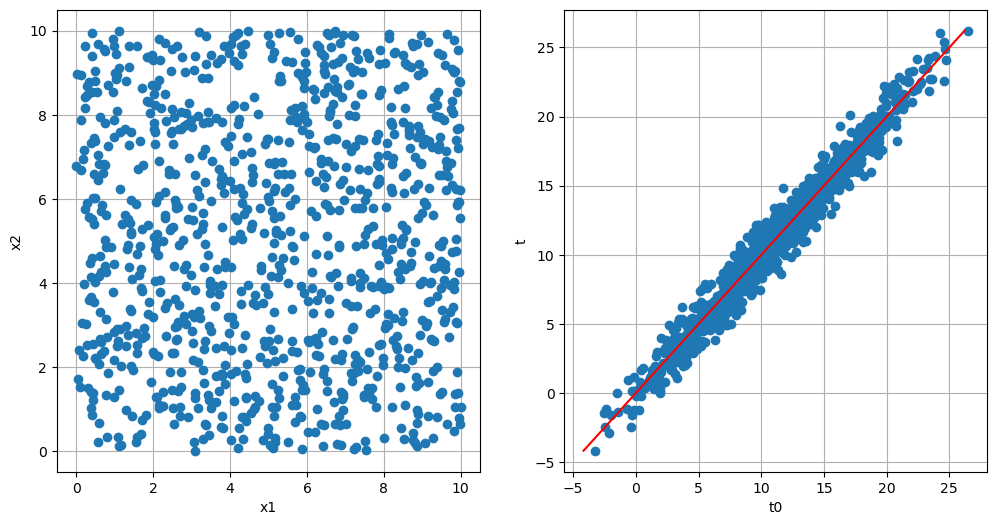

Error esperado = 1056.482110


In [2]:
# Parametros:
d = 5 # Dimension del problema
w = np.random.randn(1, d)
b = 1.0
xmin = 0.0
xmax = 10.0
noise = 1.0
n = 1000

# Datos del problema generados al azar:
x = xmin + np.random.rand(n, d)*(xmax - xmin)
t0 = np.dot(x, w.T) + b
t = t0 + np.random.randn(n, 1)*noise
tmin = np.min(t)
tmax = np.max(t)

# Distribucion de las dos primeras variables:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(x[:, 0], x[:, 1], 'o')
plt.grid(True)
plt.xlabel("x1")
plt.ylabel("x2")
plt.subplot(122)

# Grafica de t frente a t0:
plt.plot(t0, t, 'o')
plt.plot([tmin, tmax], [tmin, tmax], 'r-')
plt.grid(True)
plt.xlabel("t0")
plt.ylabel("t")
plt.show()

# Error esperado:
e = np.sum((t-t0)*(t-t0))
print("Error esperado = %f" % e)

Forma de los vectores:

In [3]:
print(x.shape)
print(t.shape)

(1000, 5)
(1000, 1)


Modelo de regresión lineal con los parámetros inicializados al azar:

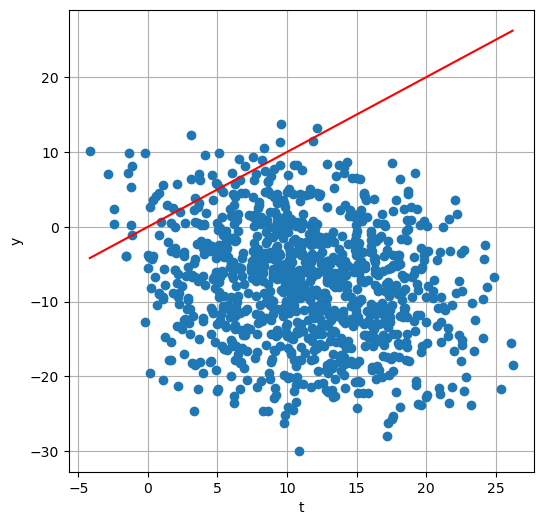

Error = 462285.076027


In [4]:
w = np.random.randn(1, d)
b = np.random.randn()

# Aplico el modelo a los datos y comparo la prediccion y con el objetivo t:
y = np.dot(x, w.T) + b

# Grafica de y frente a t:
plt.figure(figsize=(6, 6))
plt.plot(t, y, 'o')
plt.plot([tmin, tmax], [tmin, tmax], 'r-')
plt.grid(True)
plt.xlabel("t")
plt.ylabel("y")
plt.show()

# Error:
e = np.sum((y-t)*(y-t))
print("Error = %f" % e)

Entrenamiento del modelo:

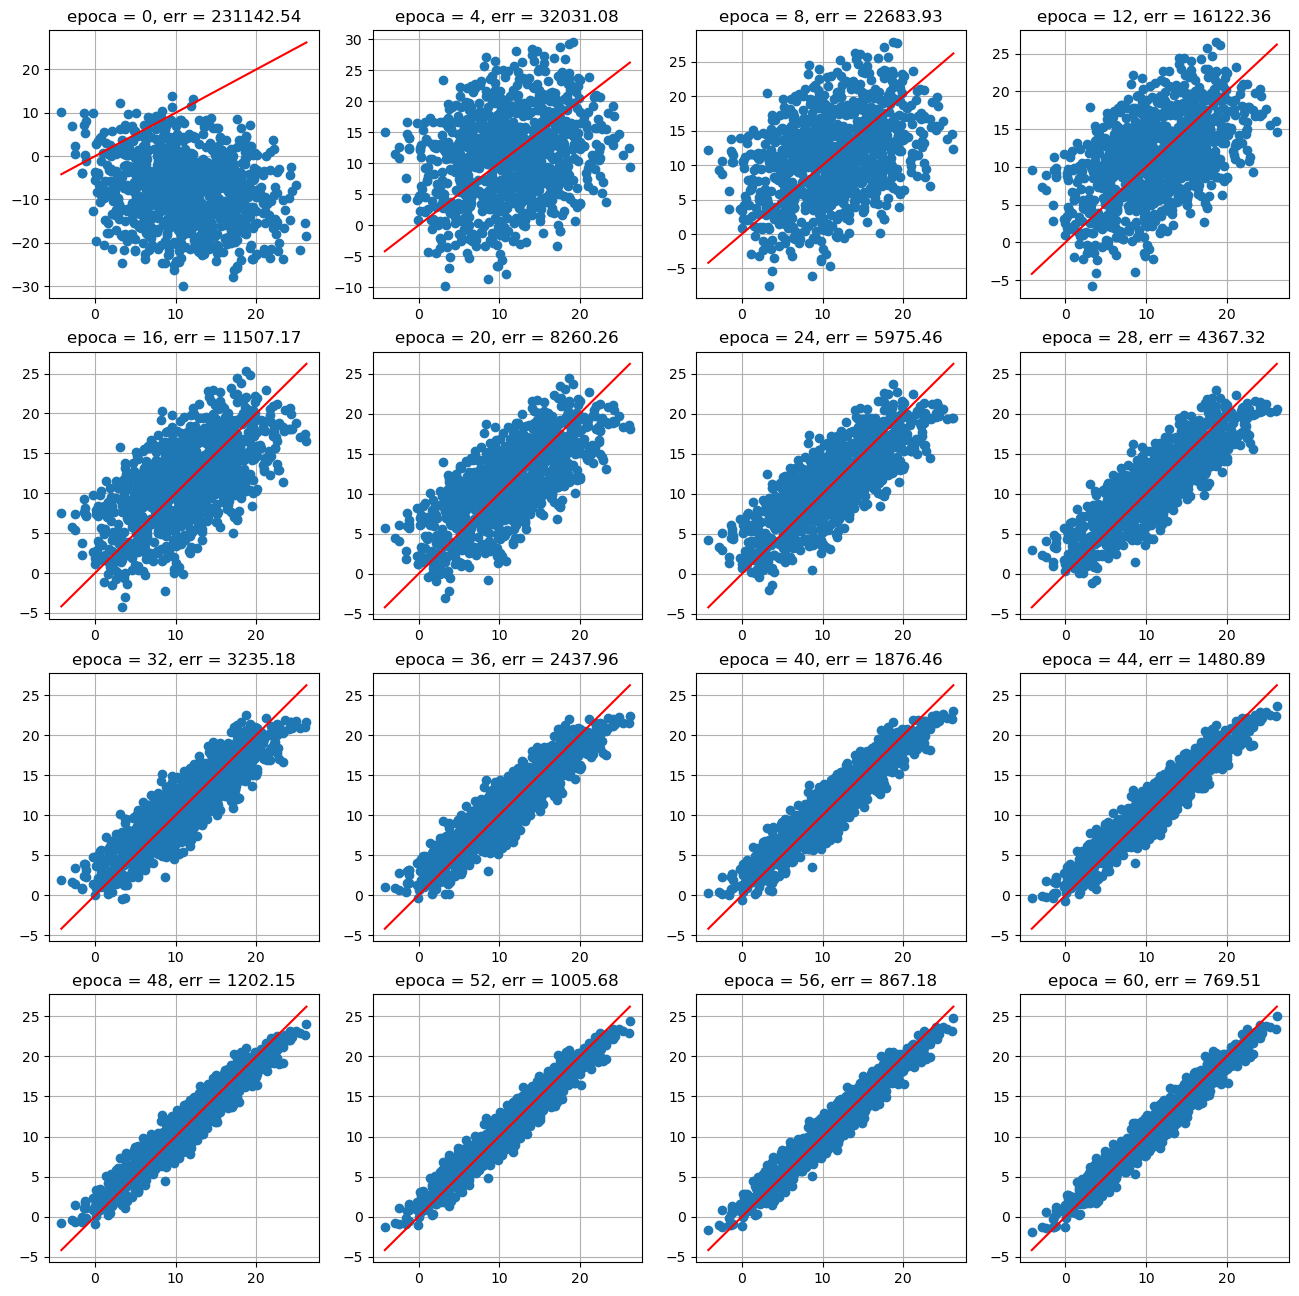

In [5]:
nepocas = 64
eta = 0.000005

plt.figure(figsize=(16,16))

k = 1
error = []
for epoch in range(nepocas):
    y = np.dot(x, w.T) + b

    #----------------------------------------------------------
    # TO-DO: Calcula el error:
    e = 0 # TO-DO actualiza el error
    #----------------------------------------------------------
    error.append(e)

    if epoch%4 == 0:
        plt.subplot(4, 4, k)
        plt.plot(t, y, 'o')
        plt.plot([tmin, tmax], [tmin, tmax], 'r-')
        plt.grid(True)
        plt.title("epoca = %d, err = %.2f" % (epoch, e))
        k += 1

    #----------------------------------------------------------
    # TO-DO: Calcula los gradientes y actualiza los parametros:

    b = b # TO-DO actualiza los parámetros
    w = w # TO-DO actualiza los parámetros
    #----------------------------------------------------------

plt.show()

Error frente a número de épocas:

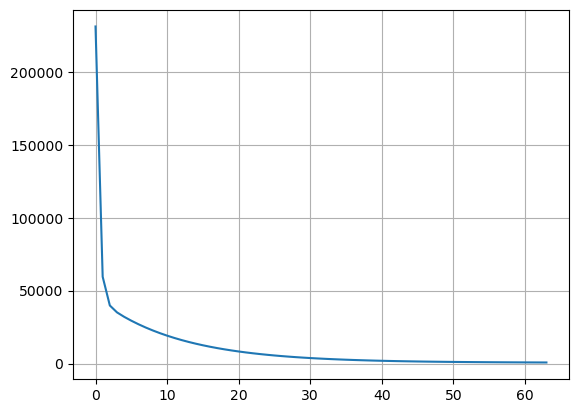

In [6]:
plt.plot(range(nepocas), error)
plt.grid(True)
plt.show()

# California Housing

California Housing contiene información sobre viviendas en distintas áreas de California, basada en el censo de 1990. El objetivo consiste en predecir el valor medio de las viviendas en cada área. Los atributos son los siguientes:

* **MedInc**: Ingreso medio de los hogares dentro de un área

* **HouseAge**: Edad media de una vivienda dentro de un área

* **AveRooms**: Promedio de habitaciones en una vivienda dentro de un área

* **AveBedrms**: Promedio de dormitorios en una vivienda dentro de un área

* **Population**: Población en el área

* **AveOccup**: Tamaño de familia promedio en el área

* **Latitude**: Latitud

* **Longitude**: Longitud

In [7]:
from sklearn.datasets import fetch_california_housing

x, t = fetch_california_housing(return_X_y=True, as_frame=True)
print(x.shape)
print(t.shape)

(20640, 8)
(20640,)


In [8]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Separamos en train - test para evaluar:

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, t, test_size=0.2, random_state=42)

print("TRAIN", x_train.shape, y_train.shape)
print("TEST", x_test.shape, y_test.shape)

TRAIN (16512, 8) (16512,)
TEST (4128, 8) (4128,)


Estandarizamos:

In [10]:
# Estandarizar los datos:
medias = x_train.mean()
stds = x_train.std()
x_train = (x_train - medias) / stds
x_test = (x_test - medias) / stds

Nos quedamos sólo con los primeros 1000 ejemplos para que las ejecuciones sean más rápidas.

In [11]:
x_train = x_train[:1000]
y_train = y_train[:1000]

Para no tener problemas con el tipo de dato, vamos a trabajar siempre con numpy.

In [12]:
x_train = x_train.values
y_train = y_train.values
x_test = x_test.values
y_test = y_test.values

Construye un modelo de regresión lineal para predecir la variable $t$ a partir de los atributos $x$.

In [13]:
d = x_train.shape[1]

w = np.random.randn(1, d)
b = np.random.randn()

nepocas = 400
lr = 0.0001

k = 1
error = []
for i in range(nepocas):
    pred = np.dot(x_train, w.T) + b
    pred = pred[:, 0]

    #----------------------------------------------------------
    # TO-DO: Calcula el error:
    e = 0 # TO-DO actualiza el error
    #----------------------------------------------------------
    error.append(e)

    #----------------------------------------------------------
    # TO-DO: Calcula los gradientes y actualiza los parametros:

    b = b  # TO-DO actualiza los parámetros
    w = w  # TO-DO actualiza los parámetros
    #----------------------------------------------------------


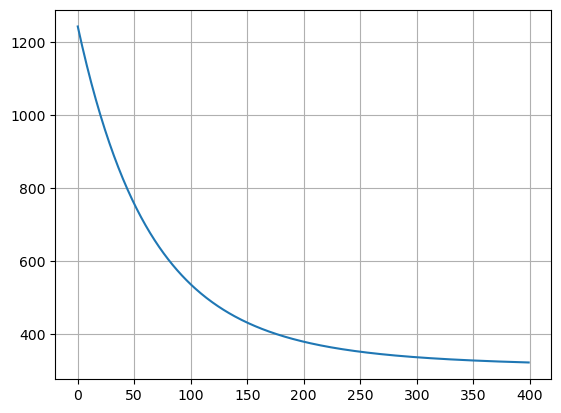

In [14]:
plt.plot(range(nepocas), error)
plt.grid(True)
plt.show()

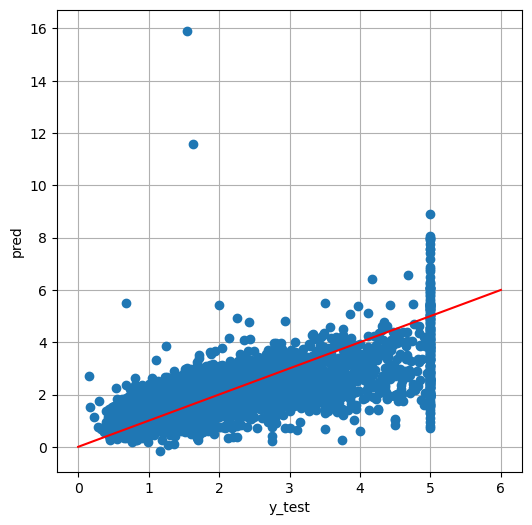

Error = 0.796501


In [15]:
# Aplico el modelo a los datos y comparo la prediccion y con el objetivo t:
pred = np.dot(x_test, w.T) + b
pred = pred[:, 0]

# Grafica de y frente a t:
plt.figure(figsize=(6, 6))
plt.plot(y_test, pred, 'o')
plt.plot([0, 6], [0, 6], 'r-')
plt.grid(True)
plt.xlabel("y_test")
plt.ylabel("pred")
plt.show()

# Error:
e = np.mean((pred-y_test)*(pred-y_test))
print("Error = %f" % e)

## Comprobación de California Housing con otras alternativas

Vamos a comprobarlo con la regresión lineal implementada con Sklearn:

In [16]:
from sklearn.metrics import mean_squared_error

### Regresión lineal siguiendo la estrategia de minimización mediante descenso por gradiente (SGD)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor

In [19]:
from sklearn.linear_model import SGDRegressor

In [20]:
lr = SGDRegressor(penalty=None).fit(x_train, y_train)
pred = lr.predict(x_train)
print("TRAIN:", mean_squared_error(y_train, pred))
pred = lr.predict(x_test)
print("TEST:", mean_squared_error(y_test, pred))

TRAIN: 0.46741367180321336
TEST: 0.544019264792018


In [21]:
# La variable coef_ representa los pesos de cada atributo
lr.coef_

array([ 0.88806231,  0.17309478, -0.24067391,  0.22791637, -0.00542289,
       -0.37469938, -0.71296403, -0.65808417])

In [22]:
# La variable intercept_ representa el bias
lr.intercept_

array([2.06235825])

## Probemos la regresión lineal con regularización L1 o L2

### Regularización Ridge (L2)

La clase ```SGDRegressor``` implementa la opción de penalizar tanto con L1 como con L2 el entrenamiento de descenso por gradiente.

In [23]:
lr = SGDRegressor(penalty='l2', alpha=0.1).fit(x_train, y_train)
pred = lr.predict(x_train)
print("TRAIN:", mean_squared_error(y_train, pred))
pred = lr.predict(x_test)
print("TEST:", mean_squared_error(y_test, pred))

TRAIN: 0.5194795749150778
TEST: 0.5796759791188791


In [24]:
# La variable coef_ guarda todos los pesos de la regresión
lr.coef_

array([ 0.77629833,  0.17639213, -0.07607088,  0.0472813 , -0.00157564,
       -0.15372665, -0.39893841, -0.34207343])

In [25]:
# La variable intercept_ guarda el bias
lr.intercept_

array([2.0747544])

Pintemos los pesos de los atributos con un diagrama de barras. Así podremos saber qué "importancia" le da nuestro modelo a los atributos de entrada.

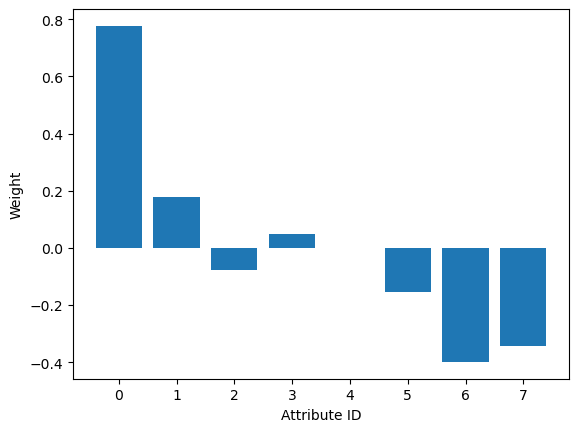

In [26]:
plt.bar(np.arange(len(lr.coef_)), lr.coef_)
plt.xlabel("Attribute ID")
plt.ylabel("Weight")
plt.show()

Veamos ahora el error frente al factor alpha de regularización L2:

In [27]:
l2_values = [0.0, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0]
errores = []
for l2 in l2_values:
    lr = SGDRegressor(penalty='l2', alpha=l2).fit(x_train, y_train)
    pred = lr.predict(x_test)
    e = mean_squared_error(y_test, pred)
    errores.append(e)

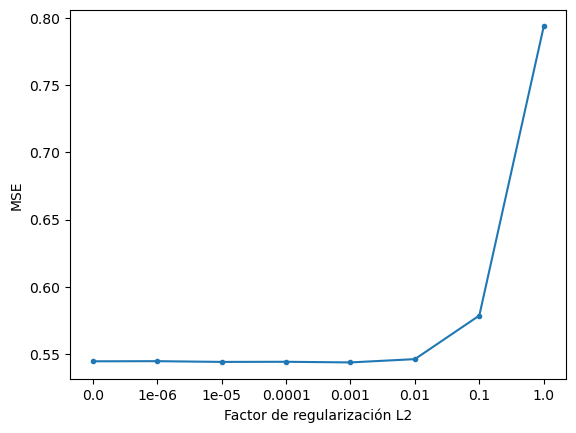

In [28]:
plt.plot(errores, '.-')
plt.xticks(np.arange(len(l2_values)), l2_values)
plt.xlabel("Factor de regularización L2")
plt.ylabel("MSE")
plt.show()

# En la figura vemos que cuanto mayor penalización damos a los pesos, mayor es el MSE

### Regularización Lasso (L1)

La clase ```SGDRegressor``` implementa la opción de penalizar tanto con L1 como con L2 el entrenamiento de descenso por gradiente.

In [29]:
lr = SGDRegressor(penalty='l1', alpha=0.1).fit(x_train, y_train)
pred = lr.predict(x_test)
mean_squared_error(y_test, pred)

0.6671281721055285

Pintemos los pesos de los atributos con un diagrama de barras. Así podremos saber qué "importancia" le da nuestro modelo a los atributos de entrada.

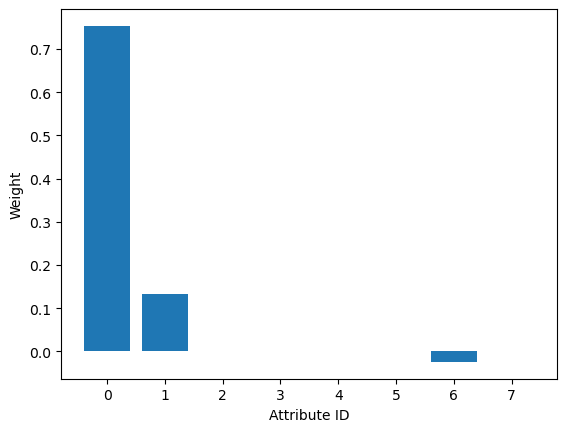

In [30]:
plt.bar(np.arange(len(lr.coef_)), lr.coef_)
plt.xlabel("Attribute ID")
plt.ylabel("Weight")
plt.show()

# Con la regularización L1 (mucho más agresiva que la L2) vemos como los pesos de algunos atributos tienden a 0,
# es decir, el modelo aprende a realizar una selección de características de entrada.

Veamos ahora el error frente al factor alpha de regularización L1:

In [31]:
l1_values = [0.0, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0]
errores = []
for l1 in l1_values:
    lr = SGDRegressor(penalty='l1', alpha=l1).fit(x_train, y_train)
    pred = lr.predict(x_test)
    e = mean_squared_error(y_test, pred)
    errores.append(e)

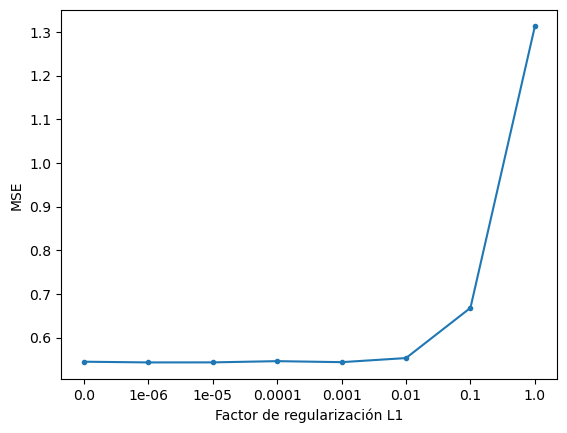

In [32]:
plt.plot(errores, '.-')
plt.xticks(np.arange(len(l1_values)), l1_values)
plt.xlabel("Factor de regularización L1")
plt.ylabel("MSE")
plt.show()

# En la figura vemos que cuanto mayor penalización damos a los pesos, mayor es el MSE
# Ojo en la escala. Fíjate además como L1, comparada con L2, es más agresiva.

### ElasticNet

La clase ```SGDRegressor``` implementa la opción de penalizar tanto con L1 como con L2 el entrenamiento de descenso por gradiente. Si quieres combinar ambas regularizaciones, tienes la opción de utilizar la configuración *ElasticNet*, cuya penalización se expresa de la siguiente manera:

$$Penalización ElasticNet = \alpha (\phi L1 + (1 - \phi) L2)$$

donde $\alpha$ es el factor de regularización (parámetro `alpha`) y $\phi$ es el parámetro que define la contribución de las penalizaciones (parámetro `l1_ratio`).

In [33]:
lr = SGDRegressor(penalty='elasticnet', alpha=0.1, l1_ratio=0.15).fit(x_train, y_train)
pred = lr.predict(x_test)
mean_squared_error(y_test, pred)

0.5975850108296615

**¿Puedo intentar implementar un algoritmo de selección de atributos a partir de una regresión lineal?**

No olvidemos la diferencia entre selección de atributos y explicabilidad de un modelo. Hagámoslo.

## ¿Y si hacemos selección de atributos según los pesos?

In [34]:
import pandas as pd

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, t, test_size=0.2, random_state=42)
medias = x_train.mean()
stds = x_train.std()
x_train = (x_train - medias) / stds
x_test = (x_test - medias) / stds
x_train = x_train[:1000]
y_train = y_train[:1000]

### Modelo sin regularización

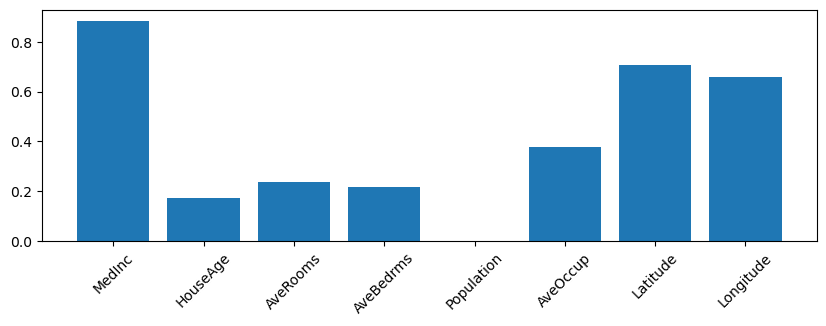

In [36]:
lr = SGDRegressor(penalty=None).fit(x_train.values, y_train.values)
w = lr.coef_

R = np.abs(w)

plt.figure(figsize=(10, 3))
plt.bar(range(len(R)), R)
plt.xticks(range(len(R)), x.columns, rotation=45)
plt.show()

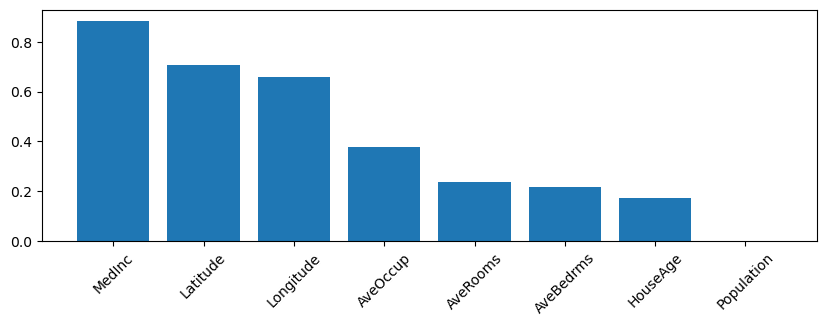

In [37]:
# Ordenamos de mayor a menor relevancia según w
df = pd.DataFrame(R, index=x.columns, columns=["Relevance"])
df = df.sort_values(by="Relevance", ascending=False)
plt.figure(figsize=(10, 3))
plt.bar(range(len(df)), df["Relevance"])
plt.xticks(range(len(df)), df.index, rotation=45)
plt.show()

 Uso de más a menos relevante
['MedInc']
['MedInc', 'Latitude']
['MedInc', 'Latitude', 'Longitude']
['MedInc', 'Latitude', 'Longitude', 'AveOccup']
['MedInc', 'Latitude', 'Longitude', 'AveOccup', 'AveRooms']
['MedInc', 'Latitude', 'Longitude', 'AveOccup', 'AveRooms', 'AveBedrms']
['MedInc', 'Latitude', 'Longitude', 'AveOccup', 'AveRooms', 'AveBedrms', 'HouseAge']
['MedInc', 'Latitude', 'Longitude', 'AveOccup', 'AveRooms', 'AveBedrms', 'HouseAge', 'Population']
 Uso de menos a más relevante
['Population']
['HouseAge', 'Population']
['AveBedrms', 'HouseAge', 'Population']
['AveRooms', 'AveBedrms', 'HouseAge', 'Population']
['AveOccup', 'AveRooms', 'AveBedrms', 'HouseAge', 'Population']
['Longitude', 'AveOccup', 'AveRooms', 'AveBedrms', 'HouseAge', 'Population']
['Latitude', 'Longitude', 'AveOccup', 'AveRooms', 'AveBedrms', 'HouseAge', 'Population']
['MedInc', 'Latitude', 'Longitude', 'AveOccup', 'AveRooms', 'AveBedrms', 'HouseAge', 'Population']


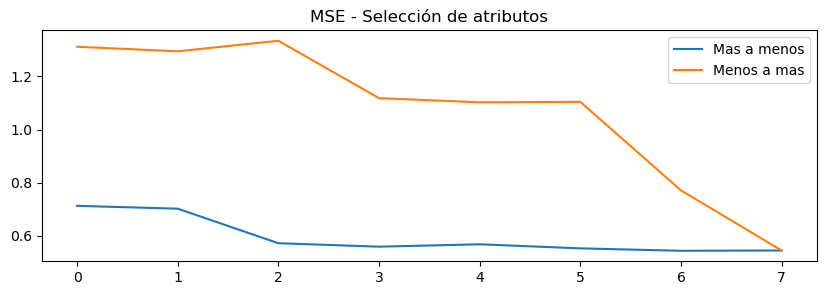

In [38]:
orden_atributos = list(df.index)

print(" Uso de más a menos relevante")
errores = []
for i in range(1, len(x.columns)+1):
    print(orden_atributos[:i])
    x_train_seleccion_atributos = x_train[orden_atributos[:i]].values
    x_test_seleccion_atributos = x_test[orden_atributos[:i]].values
    seleccion_atributos_lr = SGDRegressor(penalty=None).fit(x_train_seleccion_atributos, y_train)
    pred = seleccion_atributos_lr.predict(x_test_seleccion_atributos)
    errores.append(mean_squared_error(y_test, pred))
    
print(" Uso de menos a más relevante")
errores_inv = []
for i in range(1, len(x.columns)+1):
    print(orden_atributos[-i:])
    x_train_seleccion_atributos = x_train[orden_atributos[-i:]].values
    x_test_seleccion_atributos = x_test[orden_atributos[-i:]].values
    seleccion_atributos_lr = SGDRegressor(penalty=None).fit(x_train_seleccion_atributos, y_train)
    pred = seleccion_atributos_lr.predict(x_test_seleccion_atributos)
    errores_inv.append(mean_squared_error(y_test, pred))
    

plt.figure(figsize=(10, 3))
plt.title("MSE - Selección de atributos")
plt.plot(errores, label="Mas a menos")
plt.plot(errores_inv, label="Menos a mas")
plt.legend()
plt.show()

#------------------------------------------------------------------

### Modelo con regularización

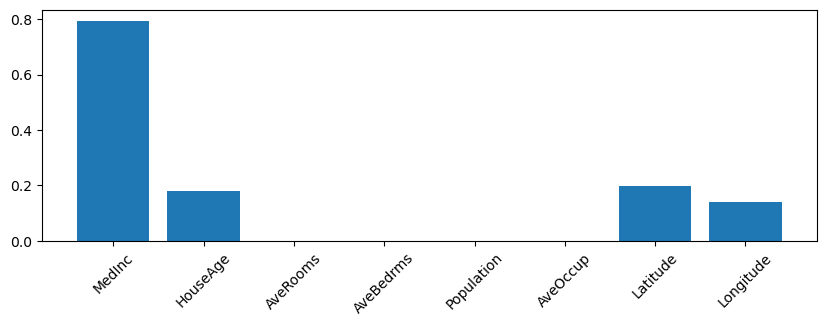

In [39]:
lr = SGDRegressor(penalty='l1', alpha=0.05).fit(x_train.values, y_train.values)
w = lr.coef_

R = np.abs(w)

plt.figure(figsize=(10, 3))
plt.bar(range(len(R)), R)
plt.xticks(range(len(R)), x.columns, rotation=45)
plt.show()

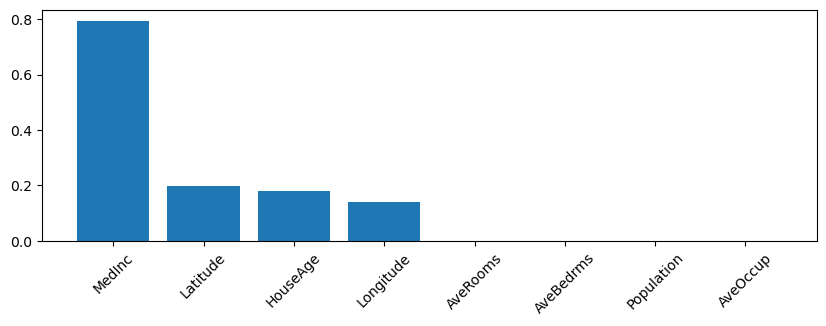

In [40]:
# Ordenamos de mayor a menor relevancia según w
df = pd.DataFrame(R, index=x.columns, columns=["Relevance"])
df = df.sort_values(by="Relevance", ascending=False)
plt.figure(figsize=(10, 3))
plt.bar(range(len(df)), df["Relevance"])
plt.xticks(range(len(df)), df.index, rotation=45)
plt.show()

 Uso de más a menos relevante
['MedInc']
['MedInc', 'Latitude']
['MedInc', 'Latitude', 'HouseAge']
['MedInc', 'Latitude', 'HouseAge', 'Longitude']
['MedInc', 'Latitude', 'HouseAge', 'Longitude', 'AveRooms']
['MedInc', 'Latitude', 'HouseAge', 'Longitude', 'AveRooms', 'AveBedrms']
['MedInc', 'Latitude', 'HouseAge', 'Longitude', 'AveRooms', 'AveBedrms', 'Population']
['MedInc', 'Latitude', 'HouseAge', 'Longitude', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
 Uso de menos a más relevante
['AveOccup']
['Population', 'AveOccup']
['AveBedrms', 'Population', 'AveOccup']
['AveRooms', 'AveBedrms', 'Population', 'AveOccup']
['Longitude', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
['HouseAge', 'Longitude', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
['Latitude', 'HouseAge', 'Longitude', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
['MedInc', 'Latitude', 'HouseAge', 'Longitude', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


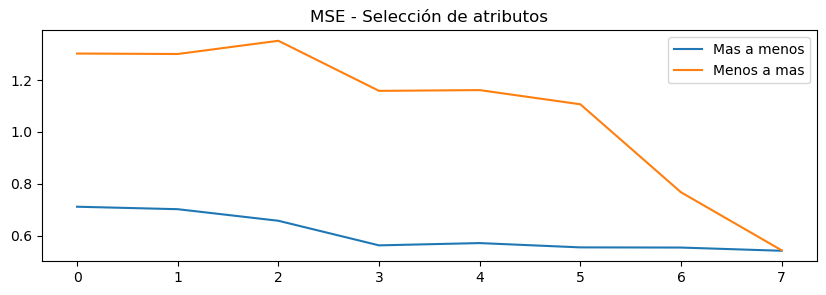

In [41]:
orden_atributos = list(df.index)

print(" Uso de más a menos relevante")
errores = []
for i in range(1, len(x.columns)+1):
    print(orden_atributos[:i])
    x_train_seleccion_atributos = x_train[orden_atributos[:i]].values
    x_test_seleccion_atributos = x_test[orden_atributos[:i]].values
    seleccion_atributos_lr = SGDRegressor(penalty=None).fit(x_train_seleccion_atributos, y_train)
    pred = seleccion_atributos_lr.predict(x_test_seleccion_atributos)
    errores.append(mean_squared_error(y_test, pred))
    
print(" Uso de menos a más relevante")
errores_inv = []
for i in range(1, len(x.columns)+1):
    print(orden_atributos[-i:])
    x_train_seleccion_atributos = x_train[orden_atributos[-i:]].values
    x_test_seleccion_atributos = x_test[orden_atributos[-i:]].values
    seleccion_atributos_lr = SGDRegressor(penalty=None).fit(x_train_seleccion_atributos, y_train)
    pred = seleccion_atributos_lr.predict(x_test_seleccion_atributos)
    errores_inv.append(mean_squared_error(y_test, pred))
    

plt.figure(figsize=(10, 3))
plt.title("MSE - Selección de atributos")
plt.plot(errores, label="Mas a menos")
plt.plot(errores_inv, label="Menos a mas")
plt.legend()
plt.show()

#------------------------------------------------------------------

## ¿Y si intentamos explicar el modelo?

¿Por qué un dato de entrada $\mathbf{x}_i$ ha dado un valor determinado $y_i$?

La respuesta a esto se basa en: **¿Qué representa exactamente la derivada de una función??**

La derivada de una función $\frac{\partial L(y, t)}{\partial x_i}$ representa la tasa de cambio de la función de coste respecto a $x_i$, es decir, cómo varía la función de coste cuando varía ligeramente $x_i$.

Los algoritmos de explicabilidad específica de redes neuronales se suelen basar en la técnica del gradiente respecto a los atributos de entrada. Si quieres explicar qué tiene que pasar en la entrada para que la predicción del modelo se acerque al valor real:

$$R_{\mathbf{x}} = - |\mathbf{x}| \cdot \nabla_\mathbf{x}L(y, t)$$

o si quieres explicar cómo se va a comportar el modelo:

$$R_{\mathbf{x}} = |\mathbf{x}| \cdot \nabla_\mathbf{x}(y)$$

Esta técnica de explicabilidad basada en gradientes se conoce como **Gradient x Input**.

In [88]:
def grad_x_input(x, model, t, explain_target=False):
    y = model.predict(x)
    w = model.coef_
    dL_dy = (y-t)[:, None]
    dy_dx = w[None, :]
    dL_dx = dL_dy @ dy_dx

    if explain_target:
        R = -np.abs(x) * dL_dx
    else:
        R = np.abs(x) * dy_dx
    return R

In [89]:
lr = SGDRegressor(penalty='l1', alpha=0.05).fit(x_train.values, y_train.values)

### Explicar el comportamiento del modelo

Podemos visualizar el comportamiento del modelo.

In [90]:
R = grad_x_input(x_train.values, lr, y_train.values, explain_target=False)
R.shape

(1000, 8)

Voy a explicar el primer dato de `x_train`. Podéis probar el item que queráis.

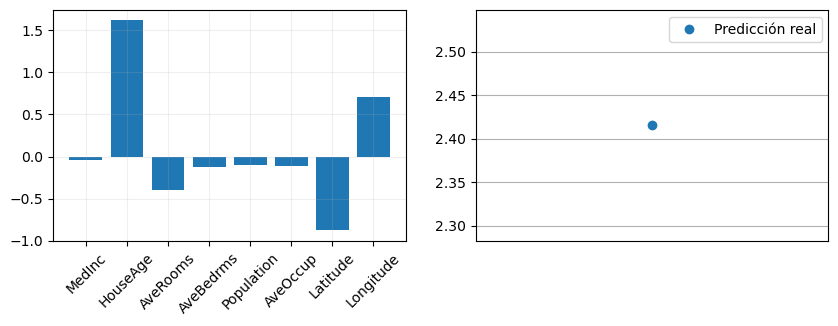

In [91]:
item = 1 # Modificar esta variable para evaluar otros ejemplos

ypred_real = lr.predict(x_train.values[item][None, :])

plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
plt.bar(range(len(x.columns)), x_train.values[item])
plt.xticks(range(len(x.columns)), x.columns, rotation=45)
plt.grid(alpha=0.2)
plt.subplot(1,2,2)
plt.plot(ypred_real, 'o', label="Predicción real")
plt.xticks([])
plt.grid()
plt.legend()
plt.show()

Dibujemos su relevancia.

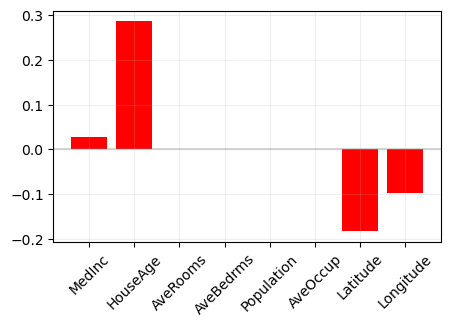

In [92]:
plt.figure(figsize=(5, 3))
plt.bar(range(len(x.columns)), R[item], color="red")
plt.xticks(range(len(x.columns)), x.columns, rotation=45)
plt.grid(alpha=0.2)
plt.axhline(0.0, color="gray", alpha=0.3)
plt.show()

La relevancia nos indica cómo afecta cada atributo a la decisión del modelo. Si la relevancia es positiva, aumentar el atributo implica que aumenta el valor de la predicción del modelo y viceversa.

In [93]:
def dibuja_figura(item, x_train, x_train_modificado, ypred_real, ypred):
    plt.figure(figsize=(10, 3))
    plt.subplot(1,2,1)
    plt.bar(range(len(x.columns)), x_train.values[item], alpha=0.5)
    plt.bar(range(len(x.columns)), x_train_modificado, color="magenta", alpha=0.5)
    plt.xticks(range(len(x.columns)), x.columns, rotation=45)
    plt.grid(alpha=0.2)
    plt.subplot(1,2,2)
    plt.plot(ypred_real, 'o', label="Predicción real")
    plt.plot(ypred, 'o', label="Predicción modificada")
    plt.annotate('', xy=(0, ypred[0]), xytext=(0, ypred_real[0]), arrowprops=dict(arrowstyle='->', color="black"))
    plt.xticks([])
    plt.grid()
    plt.legend()
    plt.show()

In [94]:
def explicabilidad(item, x_train, R, model):
    print(" >> La relevancia de los atributos es la siguiente:")
    plt.figure(figsize=(5, 3))
    plt.bar(range(len(x.columns)), R[item], color="red")
    plt.xticks(range(len(x.columns)), x.columns, rotation=45)
    plt.grid(alpha=0.2)
    plt.axhline(0.0, color="gray", alpha=0.3)
    plt.show()
    
    print(" >> Si disminuyo un atributo con relevancia positiva -> la predicción del modelo baja")
    x_train_modificado = x_train.iloc[item].copy()
    i_columna = np.random.choice(np.where(R[item] > 0)[0])
    x_train_modificado.iloc[i_columna] = x_train_modificado.iloc[i_columna] - 0.2
    ypred = model.predict(x_train_modificado.values[None, :])
    ypred_real = model.predict(x_train.iloc[item].values[None, :])
    dibuja_figura(item, x_train, x_train_modificado, ypred_real, ypred)
    
    print(" >> Si aumento un atributo con relevancia positiva -> la predicción del modelo sube")
    x_train_modificado = x_train.iloc[item].copy()
    i_columna = np.random.choice(np.where(R[item] > 0)[0])
    x_train_modificado.iloc[i_columna] = x_train_modificado.iloc[i_columna] + 0.2
    ypred = model.predict(x_train_modificado.values[None, :])
    ypred_real = model.predict(x_train.iloc[item].values[None, :])
    dibuja_figura(item, x_train, x_train_modificado, ypred_real, ypred)
    
    print(" >> Si disminuyo un atributo irrelevante -> la predicción del modelo se queda igual")
    x_train_modificado = x_train.iloc[item].copy()
    i_columna = np.random.choice(np.where(R[item] == 0)[0])
    x_train_modificado.iloc[i_columna] = x_train_modificado.iloc[i_columna] - 0.2
    ypred = model.predict(x_train_modificado.values[None, :])
    ypred_real = model.predict(x_train.iloc[item].values[None, :])
    dibuja_figura(item, x_train, x_train_modificado, ypred_real, ypred)
    
    print(" >> Si aumento un atributo irrelevante -> la predicción del modelo se queda igual")
    x_train_modificado = x_train.iloc[item].copy()
    i_columna = np.random.choice(np.where(R[item] == 0)[0])
    x_train_modificado.iloc[i_columna] = x_train_modificado.iloc[i_columna] + 0.2
    ypred = model.predict(x_train_modificado.values[None, :])
    ypred_real = model.predict(x_train.iloc[item].values[None, :])
    dibuja_figura(item, x_train, x_train_modificado, ypred_real, ypred)
    
    print(" >> Si disminuyo un atributo con relevancia negativa -> la predicción del modelo sube")
    x_train_modificado = x_train.iloc[item].copy()
    i_columna = np.random.choice(np.where(R[item] < 0)[0])
    x_train_modificado.iloc[i_columna] = x_train_modificado.iloc[i_columna] - 0.2
    ypred = model.predict(x_train_modificado.values[None, :])
    ypred_real = model.predict(x_train.iloc[item].values[None, :])
    dibuja_figura(item, x_train, x_train_modificado, ypred_real, ypred)
    
    print(" >> Si aumento un atributo con relevancia negativa -> la predicción del modelo baja")
    x_train_modificado = x_train.iloc[item].copy()
    i_columna = np.random.choice(np.where(R[item] < 0)[0])
    x_train_modificado.iloc[i_columna] = x_train_modificado.iloc[i_columna] + 0.2
    ypred = model.predict(x_train_modificado.values[None, :])
    ypred_real = model.predict(x_train.iloc[item].values[None, :])
    dibuja_figura(item, x_train, x_train_modificado, ypred_real, ypred)

 >> La relevancia de los atributos es la siguiente:


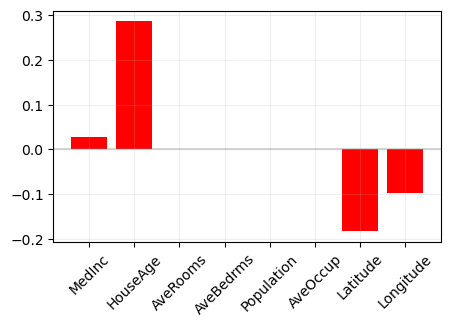

 >> Si disminuyo un atributo con relevancia positiva -> la predicción del modelo baja


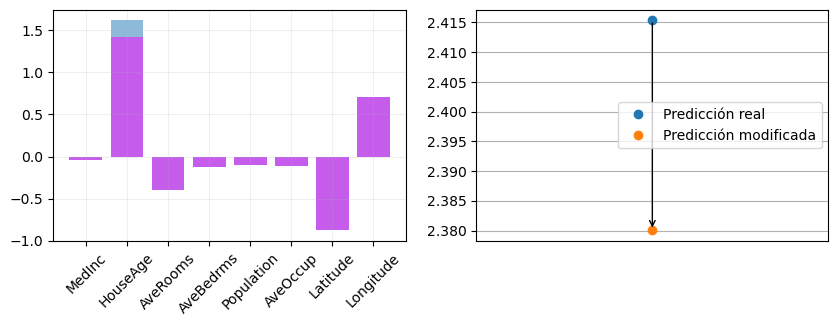

 >> Si aumento un atributo con relevancia positiva -> la predicción del modelo sube


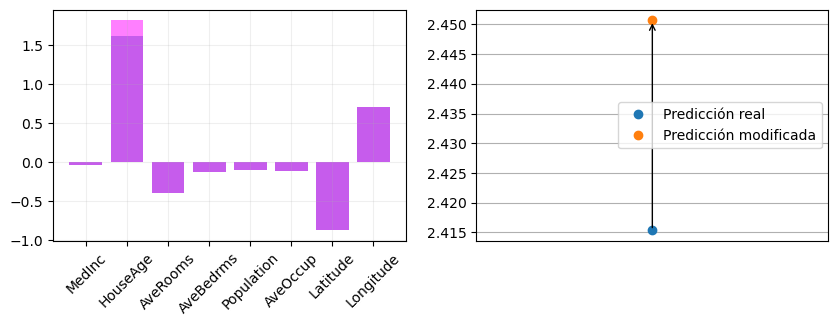

 >> Si disminuyo un atributo irrelevante -> la predicción del modelo se queda igual


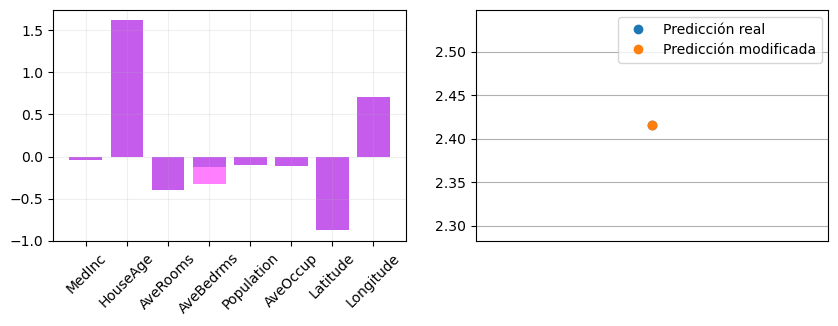

 >> Si aumento un atributo irrelevante -> la predicción del modelo se queda igual


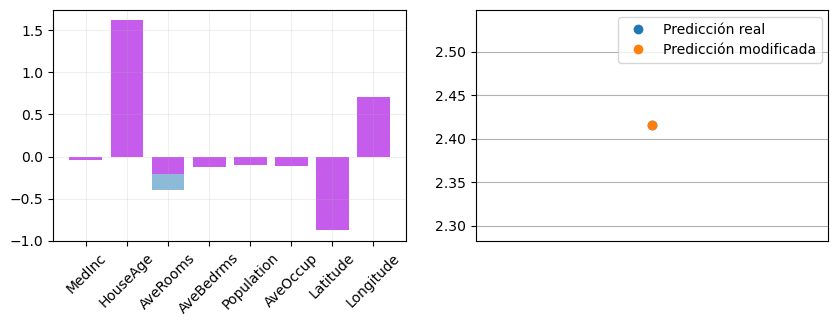

 >> Si disminuyo un atributo con relevancia negativa -> la predicción del modelo sube


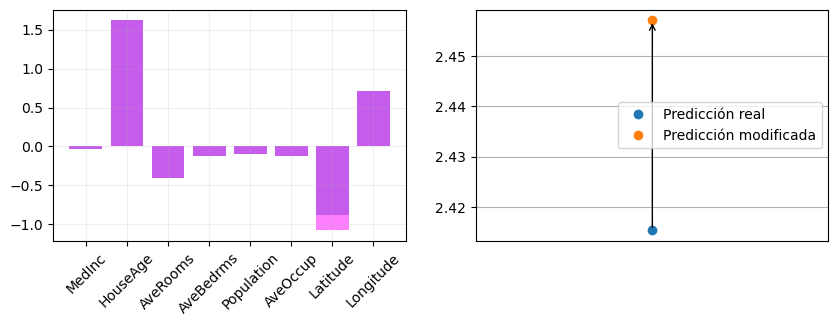

 >> Si aumento un atributo con relevancia negativa -> la predicción del modelo baja


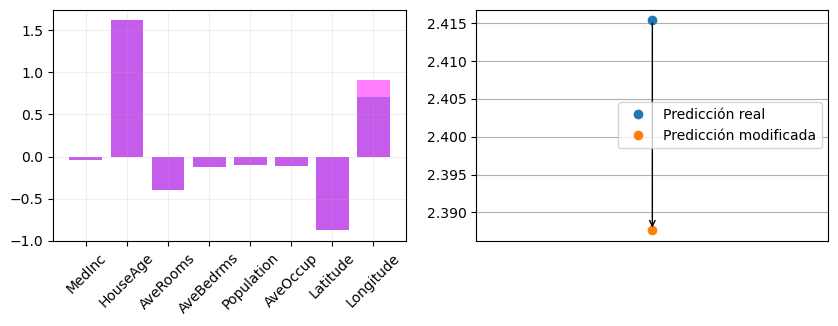

In [95]:
explicabilidad(item, x_train, R, lr)

### Explicar qué tiene que pasar en comparación con el valor real

In [96]:
R = grad_x_input(x_train.values, lr, y_train.values, explain_target=True)
R.shape

(1000, 8)

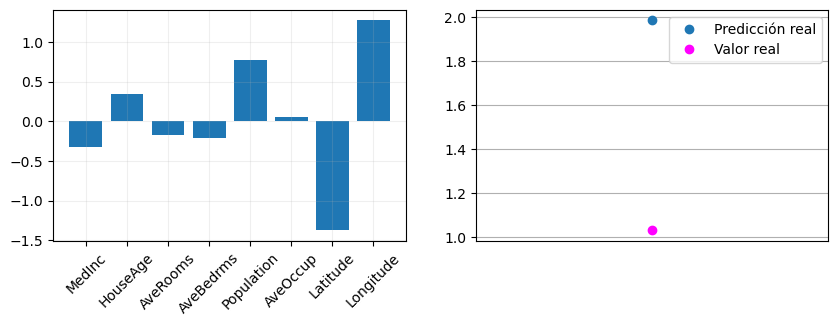

In [99]:
item = 0 # Modificar esta variable para evaluar otros ejemplos

ypred_real = lr.predict(x_train.values[item][None, :])

plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
plt.bar(range(len(x.columns)), x_train.values[item])
plt.xticks(range(len(x.columns)), x.columns, rotation=45)
plt.grid(alpha=0.2)
plt.subplot(1,2,2)
plt.plot(ypred_real, 'o', label="Predicción real")
plt.plot(y_train.values[item], 'o', label="Valor real", color="magenta")
plt.xticks([])
plt.grid()
plt.legend()
plt.show()

Dibujemos su relevancia.

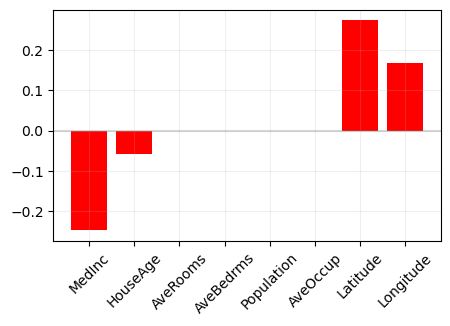

In [100]:
plt.figure(figsize=(5, 3))
plt.bar(range(len(x.columns)), R[item], color="red")
plt.xticks(range(len(x.columns)), x.columns, rotation=45)
plt.grid(alpha=0.2)
plt.axhline(0.0, color="gray", alpha=0.3)
plt.show()

La relevancia nos indica cómo afecta cada atributo a la decisión del modelo. Si la relevancia es positiva, aumentar el atributo implica que aumenta el valor de la predicción del modelo y viceversa.

In [101]:
def dibuja_figura(item, x_train, x_train_modificado, ypred_real, ypred):
    plt.figure(figsize=(10, 3))
    plt.subplot(1,2,1)
    plt.bar(range(len(x.columns)), x_train.values[item], alpha=0.5)
    plt.bar(range(len(x.columns)), x_train_modificado, color="magenta", alpha=0.5)
    plt.xticks(range(len(x.columns)), x.columns, rotation=45)
    plt.grid(alpha=0.2)
    plt.subplot(1,2,2)
    plt.plot(ypred_real, 'o', label="Predicción real")
    plt.plot(ypred, 'o', label="Predicción modificada")
    plt.plot(y_train.values[item], 'o', label="Valor real", color="magenta")
    plt.annotate('', xy=(0, ypred[0]), xytext=(0, ypred_real[0]), arrowprops=dict(arrowstyle='->', color="black"))
    plt.xticks([])
    plt.grid()
    plt.legend()
    plt.show()

In [102]:
def explicabilidad(item, x_train, R, model):
    print(" >> La relevancia de los atributos es la siguiente:")
    plt.figure(figsize=(5, 3))
    plt.bar(range(len(x.columns)), R[item], color="red")
    plt.xticks(range(len(x.columns)), x.columns, rotation=45)
    plt.grid(alpha=0.2)
    plt.axhline(0.0, color="gray", alpha=0.3)
    plt.show()
    
    print(" >> Si disminuyo un atributo con relevancia positiva -> la predicción del modelo se aleja")
    x_train_modificado = x_train.iloc[item].copy()
    i_columna = np.random.choice(np.where(R[item] > 0)[0])
    x_train_modificado.iloc[i_columna] = x_train_modificado.iloc[i_columna] - 0.2
    ypred = model.predict(x_train_modificado.values[None, :])
    ypred_real = model.predict(x_train.iloc[item].values[None, :])
    dibuja_figura(item, x_train, x_train_modificado, ypred_real, ypred)
    
    print(" >> Si aumento un atributo con relevancia positiva -> la predicción del modelo se acerca")
    x_train_modificado = x_train.iloc[item].copy()
    i_columna = np.random.choice(np.where(R[item] > 0)[0])
    x_train_modificado.iloc[i_columna] = x_train_modificado.iloc[i_columna] + 0.2
    ypred = model.predict(x_train_modificado.values[None, :])
    ypred_real = model.predict(x_train.iloc[item].values[None, :])
    dibuja_figura(item, x_train, x_train_modificado, ypred_real, ypred)
    
    print(" >> Si disminuyo un atributo irrelevante -> la predicción del modelo se queda igual")
    x_train_modificado = x_train.iloc[item].copy()
    i_columna = np.random.choice(np.where(R[item] == 0)[0])
    x_train_modificado.iloc[i_columna] = x_train_modificado.iloc[i_columna] - 0.2
    ypred = model.predict(x_train_modificado.values[None, :])
    ypred_real = model.predict(x_train.iloc[item].values[None, :])
    dibuja_figura(item, x_train, x_train_modificado, ypred_real, ypred)
    
    print(" >> Si aumento un atributo irrelevante -> la predicción del modelo se queda igual")
    x_train_modificado = x_train.iloc[item].copy()
    i_columna = np.random.choice(np.where(R[item] == 0)[0])
    x_train_modificado.iloc[i_columna] = x_train_modificado.iloc[i_columna] + 0.2
    ypred = model.predict(x_train_modificado.values[None, :])
    ypred_real = model.predict(x_train.iloc[item].values[None, :])
    dibuja_figura(item, x_train, x_train_modificado, ypred_real, ypred)
    
    print(" >> Si disminuyo un atributo con relevancia negativa -> la predicción del modelo se acerca")
    x_train_modificado = x_train.iloc[item].copy()
    i_columna = np.random.choice(np.where(R[item] < 0)[0])
    x_train_modificado.iloc[i_columna] = x_train_modificado.iloc[i_columna] - 0.2
    ypred = model.predict(x_train_modificado.values[None, :])
    ypred_real = model.predict(x_train.iloc[item].values[None, :])
    dibuja_figura(item, x_train, x_train_modificado, ypred_real, ypred)
    
    print(" >> Si aumento un atributo con relevancia negativa -> la predicción del modelo se aleja")
    x_train_modificado = x_train.iloc[item].copy()
    i_columna = np.random.choice(np.where(R[item] < 0)[0])
    x_train_modificado.iloc[i_columna] = x_train_modificado.iloc[i_columna] + 0.2
    ypred = model.predict(x_train_modificado.values[None, :])
    ypred_real = model.predict(x_train.iloc[item].values[None, :])
    dibuja_figura(item, x_train, x_train_modificado, ypred_real, ypred)

 >> La relevancia de los atributos es la siguiente:


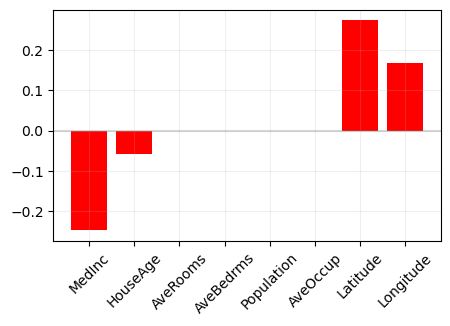

 >> Si disminuyo un atributo con relevancia positiva -> la predicción del modelo se aleja


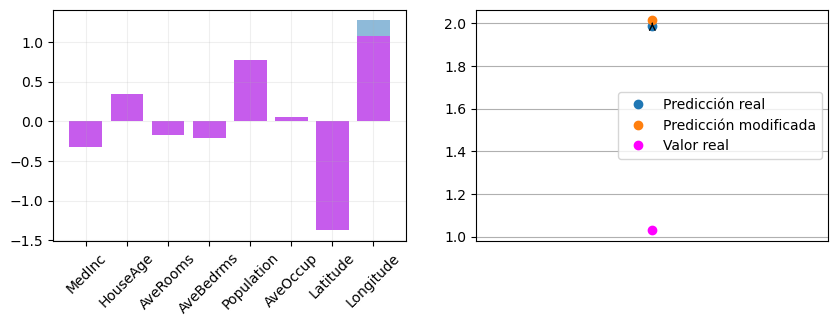

 >> Si aumento un atributo con relevancia positiva -> la predicción del modelo se acerca


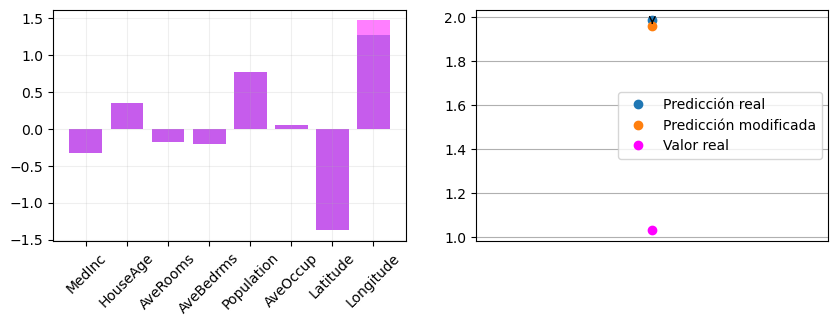

 >> Si disminuyo un atributo irrelevante -> la predicción del modelo se queda igual


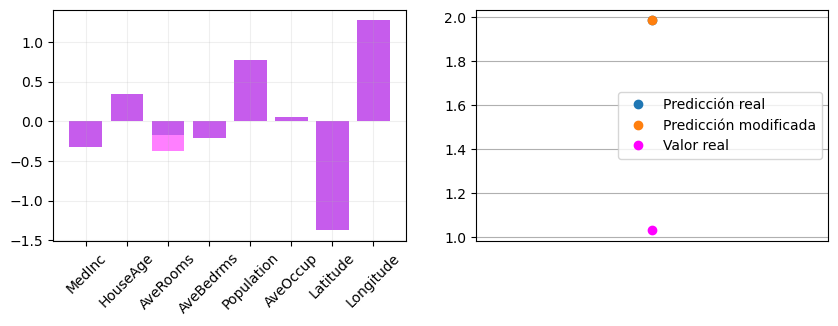

 >> Si aumento un atributo irrelevante -> la predicción del modelo se queda igual


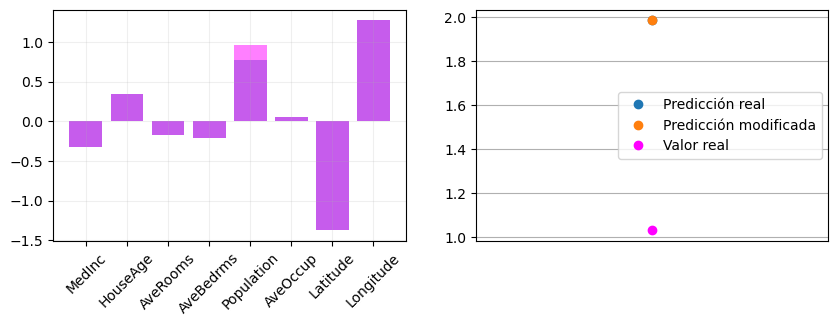

 >> Si disminuyo un atributo con relevancia negativa -> la predicción del modelo se acerca


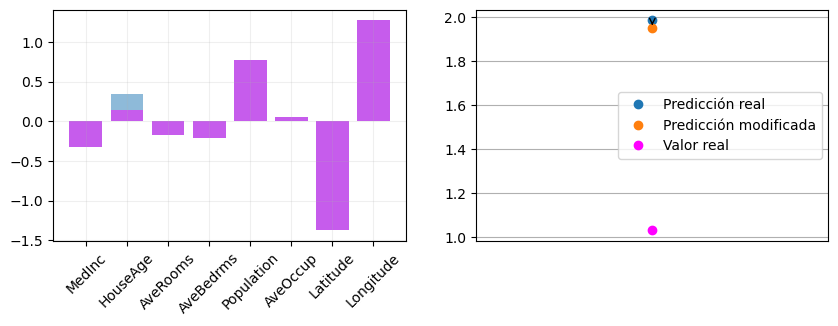

 >> Si aumento un atributo con relevancia negativa -> la predicción del modelo se aleja


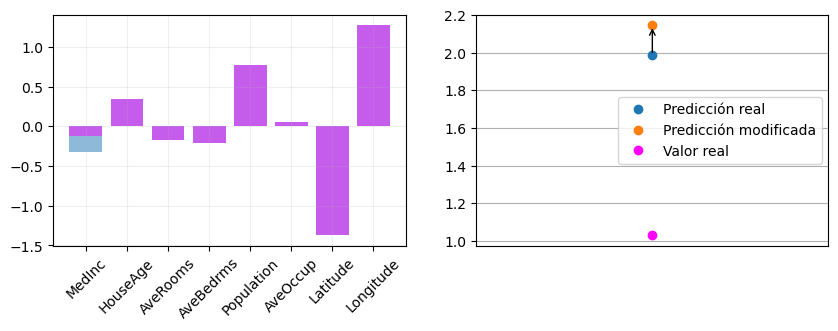

In [103]:
explicabilidad(item, x_train, R, lr)